# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [3]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [4]:
def integer_spiral_numpy(n):
    import numpy as np
    A = np.zeros((n + 2, n + 2), dtype=int)
    center = n // 2 + 1
    i = 2

    for k in range(1, n // 2 + 1):
        row = center - k + 1
        cols = np.arange(center - k + 1, center + k)
        A[row, cols] = np.arange(i, i + cols.size)
        i += cols.size

        col = center + k
        rows = np.arange(center - k + 1, center + k)
        A[rows, col] = np.arange(i, i + rows.size)
        i += rows.size

        row = center + k
        cols = np.arange(center + k, center - k, -1)
        A[row, cols] = np.arange(i, i + cols.size)
        i += cols.size

        col = center - k + 1
        rows = np.arange(center + k, center - k, -1)
        A[rows, col] = np.arange(i, i + rows.size)
        i += rows.size

    A[center, center] = 1
    return A[1:-1, 1:-1]




In [5]:
# TODO otestujte rychlost obou implementací
n = 101

print("Kontrola výsledků (7x7):")
print("Primitivní:")
print(integer_spiral(7).astype(int))

print("NumPy:")
print(integer_spiral_numpy(7).astype(int))

print("\nPorovnání rychlosti:")
print("integer_spiral:")
%timeit integer_spiral(n)

print("integer_spiral_numpy:")
%timeit integer_spiral_numpy(n)

Kontrola výsledků (7x7):
Primitivní:
[[37 36 35 34 33 32 31]
 [38 17 16 15 14 13 30]
 [39 18  5  4  3 12 29]
 [40 19  6  1  2 11 28]
 [41 20  7  8  9 10 27]
 [42 21 22 23 24 25 26]
 [43 44 45 46 47 48 49]]
NumPy:
[[ 0  0  0  0  0  0  0]
 [ 0 43 23 24 25 26 27]
 [ 0 42 21  9 10 11 28]
 [ 0 41 20  1  3 12 29]
 [ 0 40 19  6  4 13 30]
 [ 0 39 18 16 15 14 31]
 [ 0 38 36 35 34 33 32]]

Porovnání rychlosti:
integer_spiral:
9.47 ms ± 493 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
integer_spiral_numpy:
746 μs ± 77.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
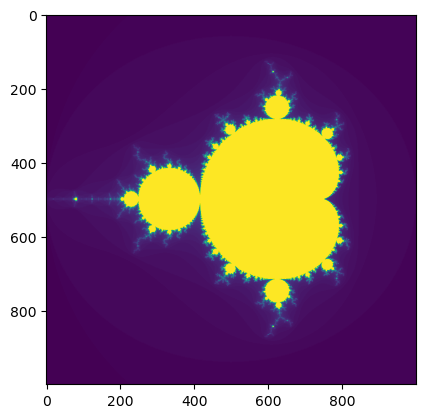

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, v kolikáté iteraci $k$ se stalo, že $|z_i| > 2$ (jakmile toto nastane jednou, už to bude platit pro všechna $n > i$)
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [6]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):

    x = np.linspace(x_min, x_max, n)
    y = np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y

    Z = np.zeros_like(C, dtype=complex)
    M = np.ones(C.shape, dtype=bool)  

    for i in range(k):
        Z = Z**2 + C
        M[np.abs(Z) > 2] = False  

        Z[M == False] = 0

    return M


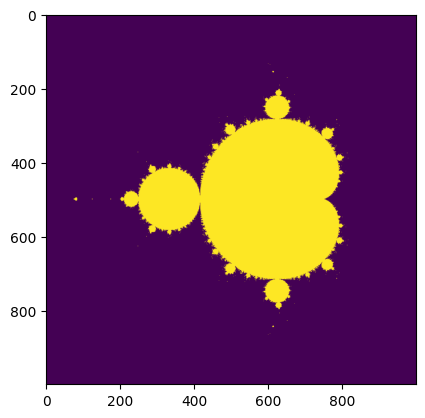

In [7]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral).